In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
import mlflow
import mlflow.sklearn

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from mlxtend.classifier import StackingClassifier

import mlflow


In [3]:
df = pd.read_csv('../datasets/Cardiovascular_Disease_Dataset.csv')
df.shape

(1000, 14)

In [4]:
df.duplicated().sum()


0

In [5]:
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [6]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [7]:
df = df.drop('patientid',axis=1)

In [8]:
df.skew()

age                  0.028408
gender              -1.251882
chestpain            0.345702
restingBP            0.020204
serumcholestrol     -0.307025
fastingbloodsugar    0.895118
restingrelectro      0.465389
maxheartrate        -0.251154
exerciseangia        0.008012
oldpeak              0.302066
slope               -0.053399
noofmajorvessels     0.291179
target              -0.324664
dtype: float64

In [9]:
def forskew(param,threshold=0.999):
    thresh = df[param].quantile(threshold)
    df[param][df[param]>thresh]=thresh
    print(df[param].skew(),param)

In [10]:
nums =['age','chestpain','restingBP','serumcholestrol','restingrelectro','maxheartrate','oldpeak','slope','noofmajorvessels']
cats = ['gender','fastingbloodsugar','exerciseangia','target']

In [11]:
for col in cats:
    print(df[col].unique(),col)

[1 0] gender
[0 1] fastingbloodsugar
[0 1] exerciseangia
[1 0] target


In [12]:
for col in nums:
    fig = px.histogram(df,x=col,width=900)
    fig.show()

In [13]:
for col in cats:
    fig = px.bar(df, x=df[col].value_counts().index, y=df[col].value_counts().values, labels={'x': col, 'y': 'Count'},width=600,height=400)
    fig.show()   

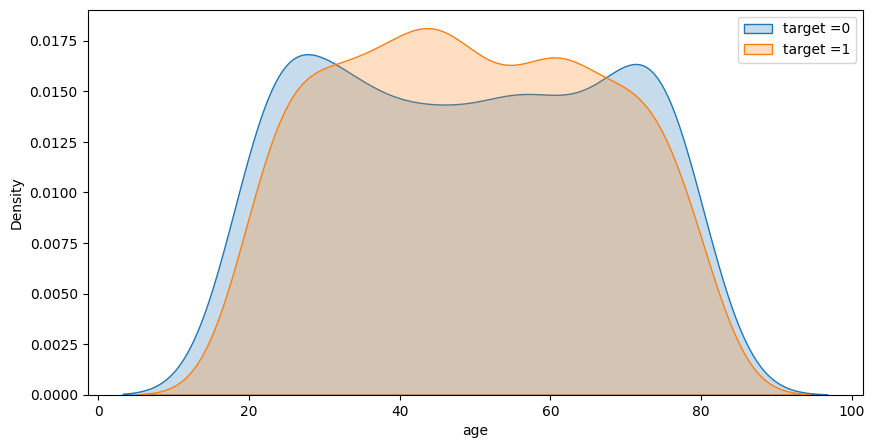

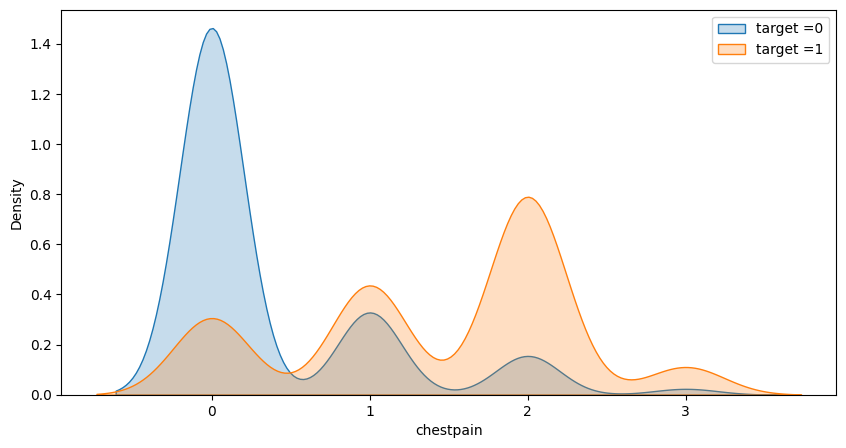

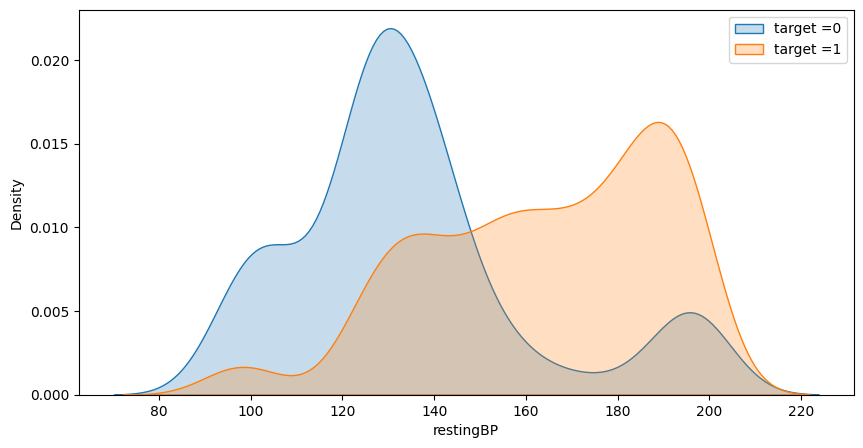

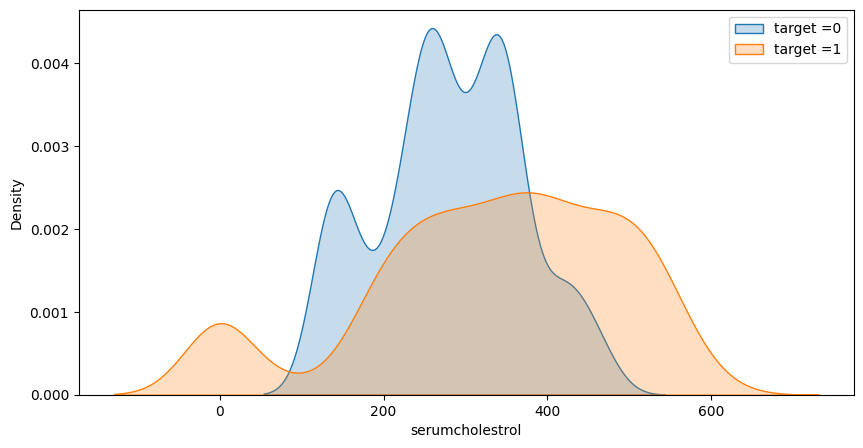

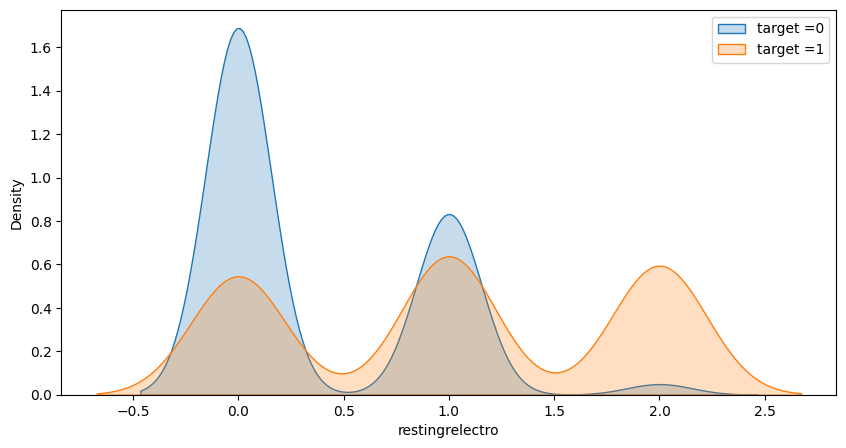

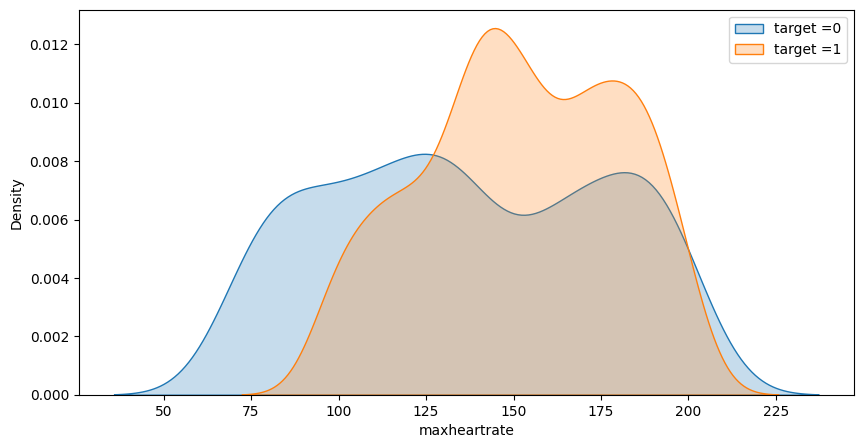

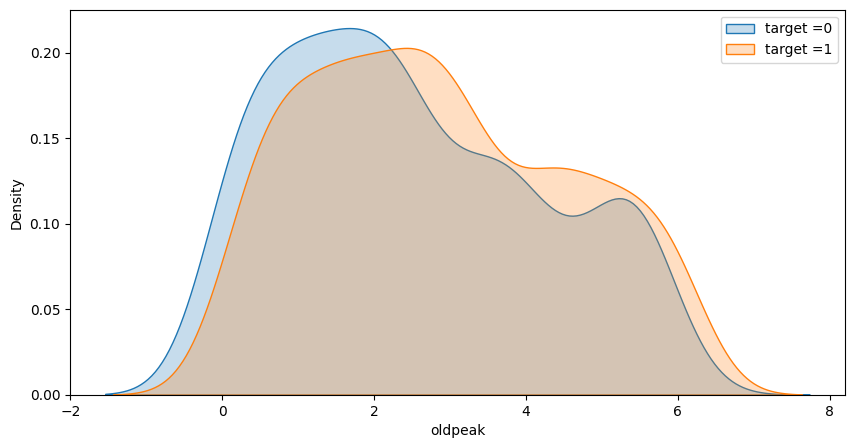

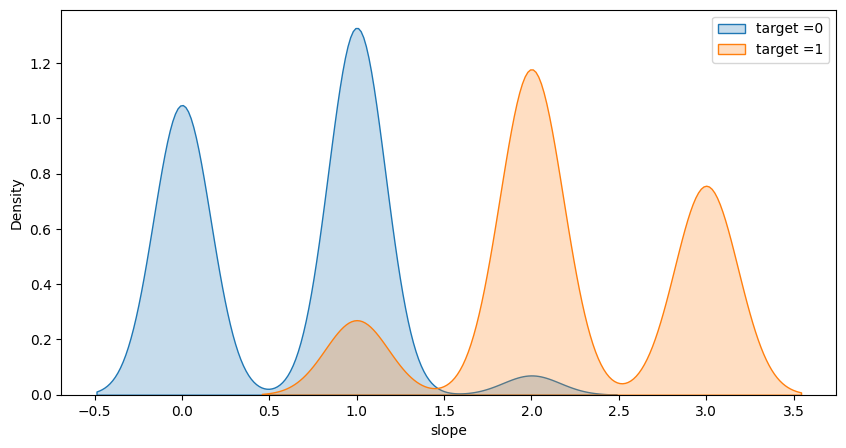

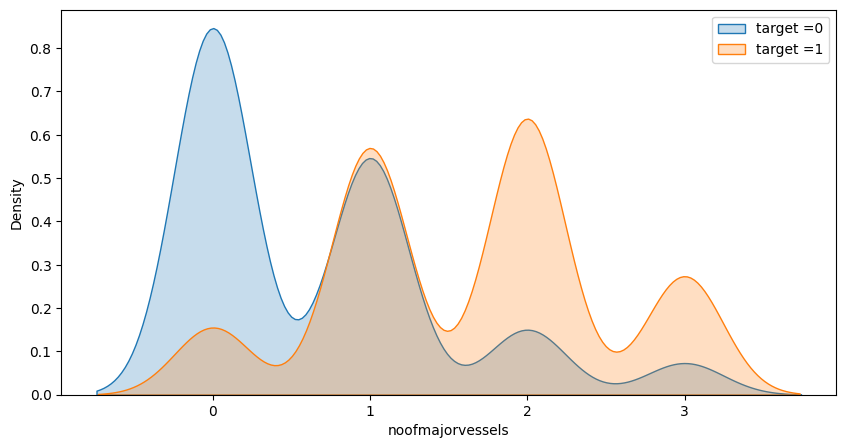

In [14]:
for col in nums:
    plt.figure(figsize=(10,5))
    sns.kdeplot(df[col][df['target']==0], fill=True,label='target =0')
    sns.kdeplot(df[col][df['target']==1], fill=True,label='target =1')
    plt.legend()
    plt.show()

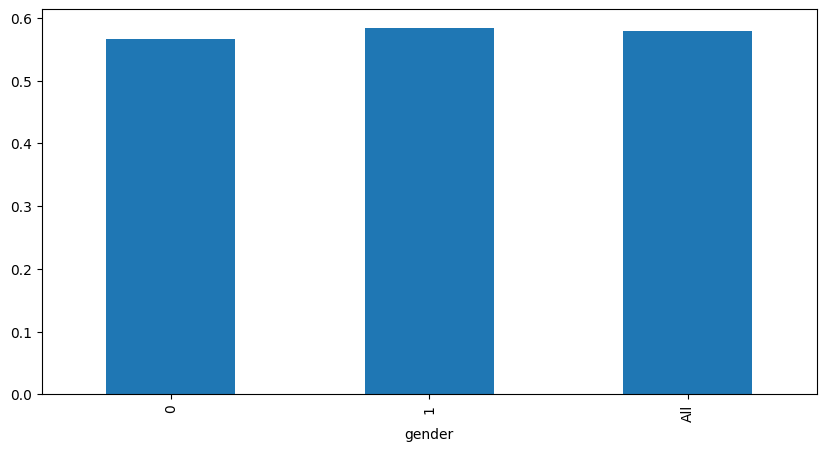

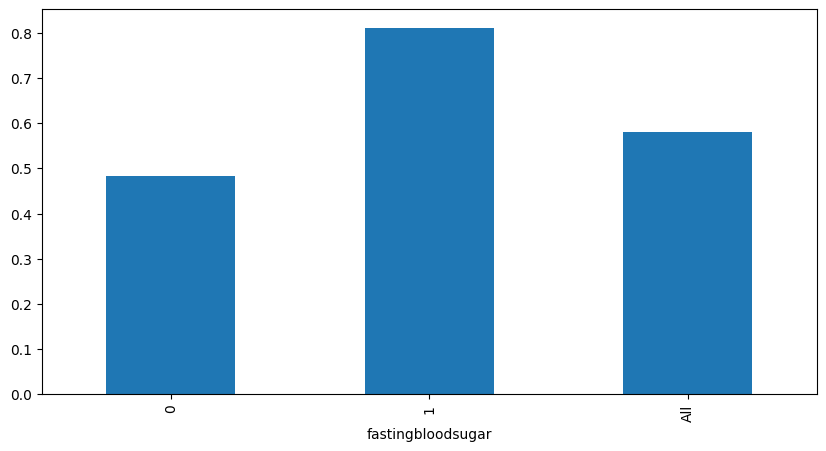

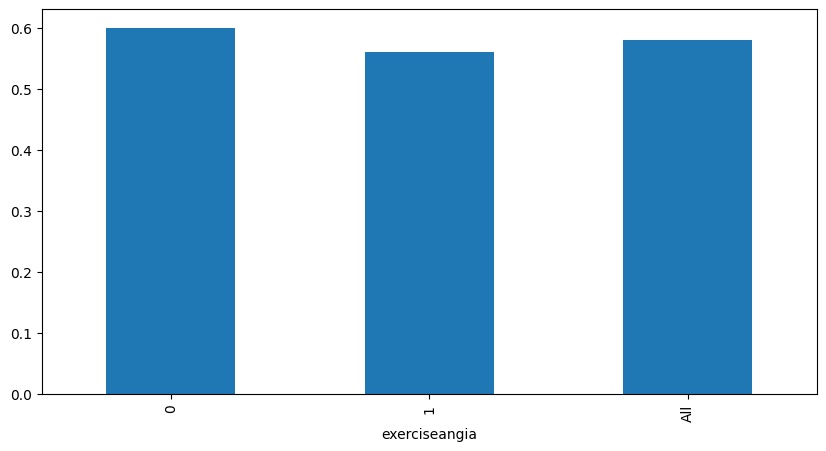

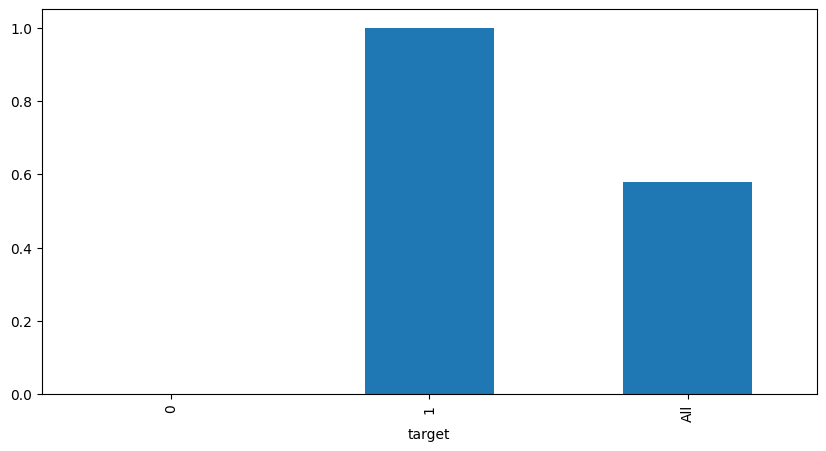

In [15]:
for col in cats:
    pivot = pd.crosstab(df[col], df['target'],margins=True)
    plt.figure(figsize=(10,5))
    (pivot[1]/pivot['All']).plot(kind='bar')
    plt.show()

In [16]:
fig1= px.scatter(df,x='fastingbloodsugar',y='chestpain',color='target',width=900)
fig1.show()

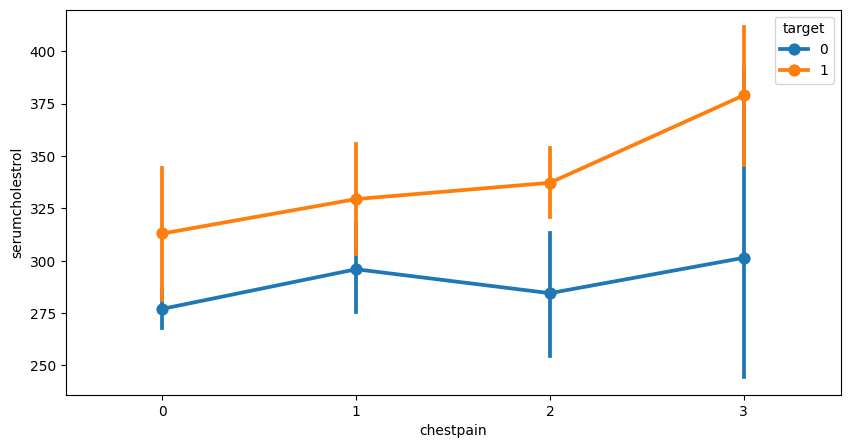

In [17]:
plt.figure(figsize=(10,5))
sns.pointplot(x='chestpain',y='serumcholestrol',hue='target',data=df)
plt.show()

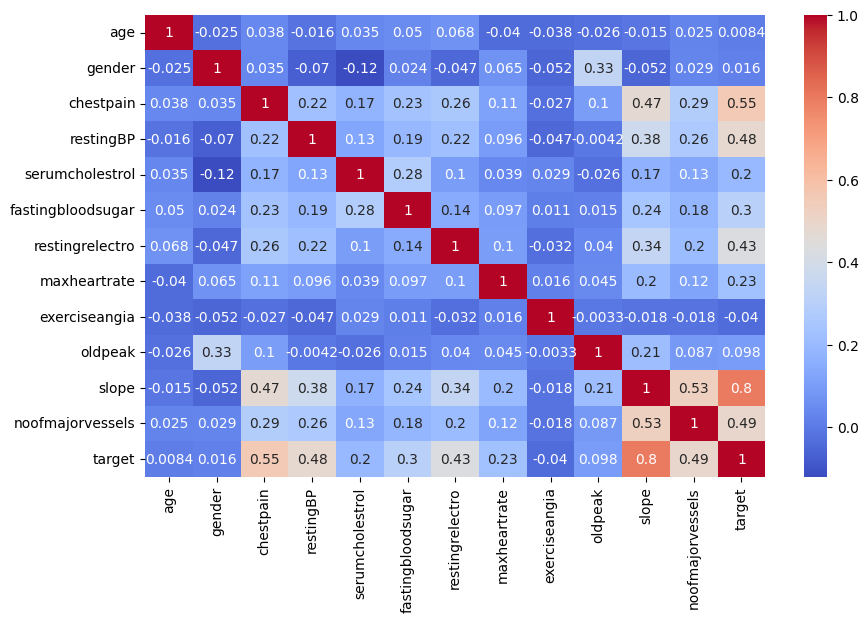

In [18]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')   
plt.show()

In [19]:

nums

['age',
 'chestpain',
 'restingBP',
 'serumcholestrol',
 'restingrelectro',
 'maxheartrate',
 'oldpeak',
 'slope',
 'noofmajorvessels']

In [20]:
x=df[['chestpain',
 'restingBP',
 'serumcholestrol',
 'restingrelectro',
 'maxheartrate',
 'oldpeak',
 'slope',
 'noofmajorvessels',
 'fastingbloodsugar']]
y=df[['target']]

In [21]:
x.head()

,chestpain,restingBP,serumcholestrol,restingrelectro,maxheartrate,oldpeak,slope,noofmajorvessels,fastingbloodsugar
0,2,171,0,1,147,5.3,3,3,0
1,0,94,229,1,115,3.7,1,1,0
2,2,133,142,0,202,5.0,1,0,0
3,0,138,295,1,153,3.2,2,2,1
4,1,199,0,2,136,5.3,3,2,0


In [22]:
pipeline = ColumnTransformer([("defaulter",OneHotEncoder(drop='first'),[]),("sc",StandardScaler(),[0,1,2,3,4,5,6,7,8])],remainder='passthrough')
pipeline.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('defaulter', OneHotEncoder(drop='first'), []),
                                ('sc', StandardScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8])])

In [23]:
x2 = pipeline.transform(x)
pd.DataFrame(x2,columns=pipeline.get_feature_names_out()).head()

,sc__chestpain,sc__restingBP,sc__serumcholestrol,sc__restingrelectro,sc__maxheartrate,sc__oldpeak,sc__slope,sc__noofmajorvessels,sc__fastingbloodsugar
0,1.070663,0.642833,-2.352717,0.327384,0.044567,1.507245,1.455350,1.819678,-0.648425
1,-1.028677,-1.928098,-0.622817,0.327384,-0.891840,0.576955,-0.538280,-0.227204,-0.648425
2,1.070663,-0.625938,-1.280028,-0.971760,1.654017,1.332816,-0.538280,-1.250645,-0.648425
3,-1.028677,-0.458995,-0.124243,0.327384,0.220143,0.286239,0.458535,0.796237,1.542199
4,0.020993,1.577717,-2.352717,1.626528,-0.277323,1.507245,1.455350,0.796237,-0.648425


In [24]:
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=3)
print(x.shape,xtr.shape,xts.shape)
print(y.shape,ytr.shape,yts.shape)

(1000, 9) (800, 9) (200, 9)
(1000, 1) (800, 1) (200, 1)


In [25]:
model = LogisticRegression()
# train the model with train data
model.fit(xtr,ytr)

C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [26]:
person = [[2,171,0,1,147,5.3,3,3,0]]
person = pipeline.transform(person)
model.predict(person)
model.predict_proba(person)

C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[2.84937261e-04, 9.99715063e-01]])

In [27]:
ypred = model.predict(xts)

In [28]:
print(classification_report(yts,model.predict(xts)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        81
           1       0.98      0.97      0.97       119

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [29]:
def get_performance(model,xts,yts):
    ypred = model.predict(xts)
    print("Accuracy ",metrics.accuracy_score(yts,ypred))
    print("Confusion Matrix ") 
    print(metrics.confusion_matrix(yts,ypred))
    print("Recall ",metrics.recall_score(yts,ypred))
    print("Precision ",metrics.precision_score(yts,ypred))
    print("F1 Score ",metrics.f1_score(yts,ypred))
get_performance(model,xts,yts)

Accuracy  0.97
Confusion Matrix 
[[ 79   2]
 [  4 115]]
Recall  0.9663865546218487
Precision  0.9829059829059829
F1 Score  0.9745762711864406


In [30]:
print("Performance of model on test data")
get_performance(model,xts,yts)
print("###############"*5)
print("Performance of model on train data")
get_performance(model,xtr,ytr)

Performance of model on test data
Accuracy  0.97
Confusion Matrix 
[[ 79   2]
 [  4 115]]
Recall  0.9663865546218487
Precision  0.9829059829059829
F1 Score  0.9745762711864406
###########################################################################
Performance of model on train data
Accuracy  0.95
Confusion Matrix 
[[319  20]
 [ 20 441]]
Recall  0.9566160520607375
Precision  0.9566160520607375
F1 Score  0.9566160520607375


In [31]:
param_grid = {"criterion":['gini','entropy'],
              "max_depth":np.arange(3,15,1),
              "min_samples_leaf":np.arange(5,30,2),
              "min_samples_split":np.arange(10,50,5),
            #   'max_features': ['log2'],
              'max_features': ['sqrt', 'log2', None],
              }
param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_leaf': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
 'min_samples_split': array([10, 15, 20, 25, 30, 35, 40, 45]),
 'max_features': ['sqrt', 'log2', None]}

In [32]:
recall_scorer = make_scorer(recall_score, pos_label=1)
f1_scorer = make_scorer(f1_score, pos_label=1)
search = GridSearchCV(tree.DecisionTreeClassifier(class_weight='balanced'),param_grid=param_grid,cv=5,scoring='recall',verbose=True,n_jobs=-1)
search.fit(x2,y)
search.best_params_
search.best_score_


In [33]:
print(search.best_estimator_)

In [38]:
model1 = tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features='log2', min_samples_leaf=15,
                       min_samples_split=20)
model1.fit(xtr,ytr)
print(classification_report(yts,model1.predict(xts)))

2023/12/14 10:57:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8f2372b229f3405e874984ea4cdb4837', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/12/14 10:57:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


2023/12/14 10:57:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


              precision    recall  f1-score   support

           0       0.94      0.93      0.93        81
           1       0.95      0.96      0.95       119

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

